In [1]:
import networkx as nx
%matplotlib inline

In [2]:
!pip3 install networkx
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Student: Adrian Roberto Carmona Rodriguez
## Group: Data 8A

# CHAPTER 1

<h2>EXERCISE 1</h2>

Often in the context of trees, a node with degree 1 is called a leaf. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [3]:
#function to detect our leaves
def get_leaves(graph):
    l = []
    nodes = graph.nodes() 
    
    #we cover all nodes and check if the dregree of the node is 1
    for node in nodes:
        if graph.degree(node) == 1:
            l.append(node)
        else:
            continue
    print(f'Nodes with degree = 1 (leaf): {l}')
    return l    
    

In [4]:
#we made our graph
graph = nx.Graph()
graph.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

assert set(get_leaves(graph)) == {'c', 'b'}

Nodes with degree = 1 (leaf): ['b', 'c']


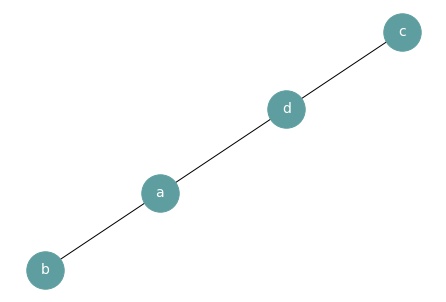

In [5]:
nx.draw(graph,
        with_labels=True,
        node_color='cadetblue',
        node_size=1400,
        font_color='white',
        font_size=14,
        )

#We can see that our graph visualization makes match with our function results, b and c.


<h2>EXERCISE 2</h2>

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.



In [6]:
def max_degree(graph2):
    
    #here we check all node degree in the graph
    degree_list = []
    for node in graph2.nodes():
        degree_list.append(graph2.degree(node))
        
    #we extract the maximum degree
    m_degree = max(degree_list)
    
    #we search in all nodes the degree that we got
    for node in graph2.nodes:
        if graph2.degree(node) == m_degree:
            node_inf = (node , m_degree) #we make a tuple
            print(f'The node with maximum degree in the graph:\n{node_inf[0]}: {node_inf[1]}')
            
    #we return the tuple
    return node_inf

In [7]:
#we make a graph with the file `friends.adjlist`
graph2 = nx.read_adjlist('friends.adjlist')
assert max_degree(graph2) == ('Claire', 4)

The node with maximum degree in the graph:
Claire: 4


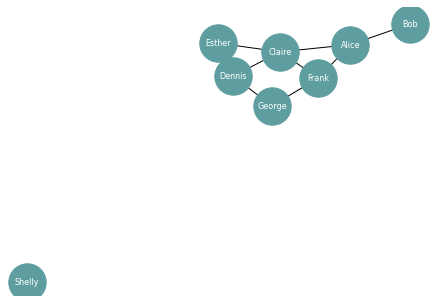

In [8]:
nx.draw(graph2,
        with_labels= True,
        node_color='cadetblue',
        node_size=1400,
        font_color='white',
        font_size=8,
        )

<h2>EXERCISE 3</h2>

Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

`mutual_friends(SG, 'Alice', 'Claire') == ['Frank']`

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in SG drawn above.

In [9]:
def mutual_friends(graph, node1, node2):
    
    #we check the neighbors for node 1
    ng_node1 = graph.neighbors(node1)
    ng_node1 = list(ng_node1)
    
    mutual_friends = []
    
    #we check the neighbors in node 2
    for node in graph.neighbors(node2):
        #if neighbor is in the neighbor list for node 1 then is a mutual friend
        
        if node in ng_node1:
            mutual_friends.append(node)
            
    print(f'Your mutual friends for {node1} & {node2} are: {mutual_friends}')
    return mutual_friends
    


In [10]:
graph3 = nx.read_adjlist('friends.adjlist')

assert mutual_friends(graph3, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(graph3, 'George', 'Bob') == []
assert sorted(mutual_friends(graph3, 'Claire', 'George')) == ['Dennis', 'Frank']

#our own test to prove it
assert sorted(mutual_friends(graph3, 'Dennis', 'Frank'))
#THE RESULT WAS RIGTH

Your mutual friends for Alice & Claire are: ['Frank']
Your mutual friends for George & Bob are: []
Your mutual friends for Claire & George are: ['Frank', 'Dennis']
Your mutual friends for Dennis & Frank are: ['George', 'Claire']


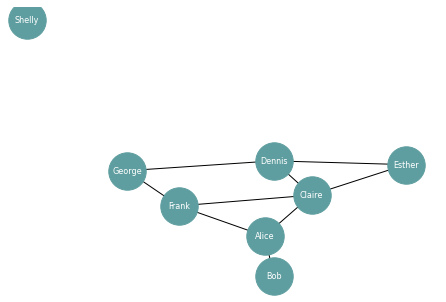

In [11]:
nx.draw(graph3,
        with_labels= True,
        node_color='cadetblue',
        node_size=1400,
        font_color='white',
        font_size=8,
        )

# CHAPTER 2

## Dataset: US air traffic network
This repository contains several example network datasets. Among these is a network of US air travel routes:

In [12]:
G = nx.read_graphml('openflights_usa.graphml.gz')




The nodes in this graph are airports, represented by their IATA codes; two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges

`[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]`

where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have attributes associated with them, containing additional information about the airports:




In [13]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:



In [14]:
G.nodes['IND']['name']

'Indianapolis International Airport'

<h2>EXERCISE 1</h2>

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

 


In [15]:
#There is not a directed path between Indianapolis and Fairbanks
G.has_edge('FAI','IND')

False

<h2>EXERCISE 2</h2>

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

 


In [16]:
#The shortest path is 3 from indianapolis to fairbanks so, the fewest number of flights is 3.
nx.shortest_path_length(G,'FAI','IND')

3

<h2>EXERCISE 3</h2>

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [17]:
#not connected because it gives false
nx.is_connected(G)

False